## Car Price Prediction

It is divided into the following sections:

- Data Understanding and exploration
- Data Cleaning
- Data Preparation
- Model Building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
# reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [123]:
# Summary of the dataset
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [124]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Validating numerical Data

In [125]:
numerical_data = cars.select_dtypes("number")
numerical_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [126]:
numerical_data.shape

(205, 16)

Total 16 numerical columns

### Validating Categorical Data

In [127]:
categorical_data = cars.select_dtypes(exclude="number").head()
categorical_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [128]:
categorical_data.shape

(5, 10)

There are 10 categorical columns

### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

#### Symboling: -2 (least risky) to +3 most risky

In [129]:
cars['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

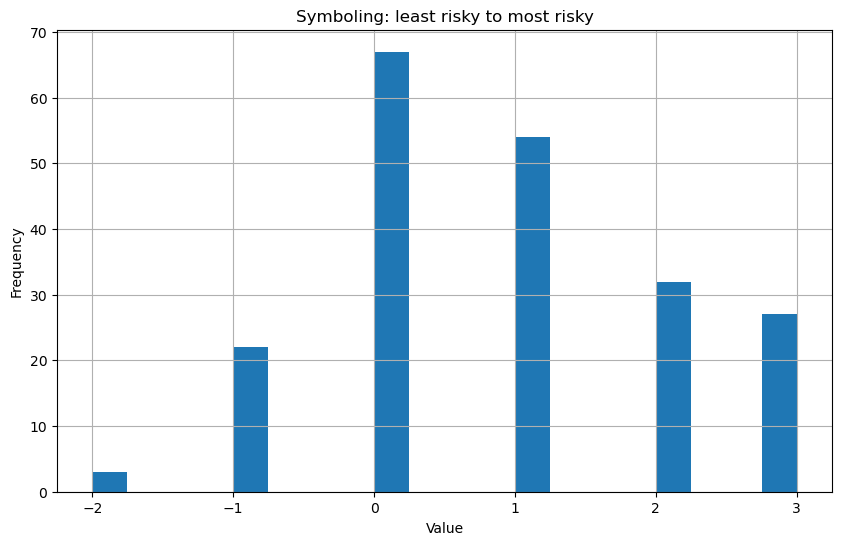

In [130]:
plt.figure(figsize=(10,6))
cars['symboling'].hist(bins=20)
plt.title('Symboling: least risky to most risky')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most cars are 0, 1, and 2

#### aspiration: An (internal combustion) engine property showing whether the oxygen intake is through standard (atmospheric pressure)or through turbocharging (pressurised oxygen intake)

In [131]:
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

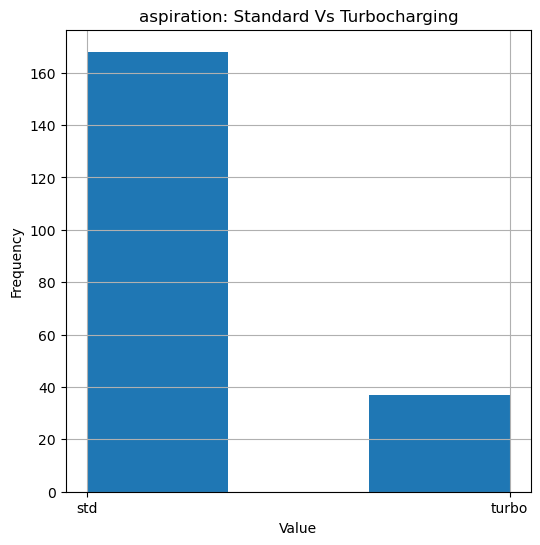

In [132]:
plt.figure(figsize=(6,6))
cars['aspiration'].hist(bins=3)
plt.title('aspiration: Standard Vs Turbocharging')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Frequency of standard is more than turbocharging

#### drivewhweel: frontwheel, rarewheel or four-wheel drive 

In [133]:
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

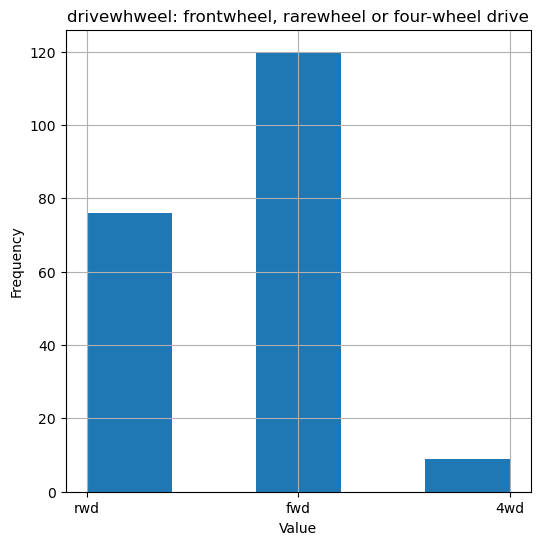

In [134]:
plt.figure(figsize=(6,6))
cars['drivewheel'].hist(bins=5)
plt.title('drivewhweel: frontwheel, rarewheel or four-wheel drive')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### wheelbase: distance between centre of front and rarewheels

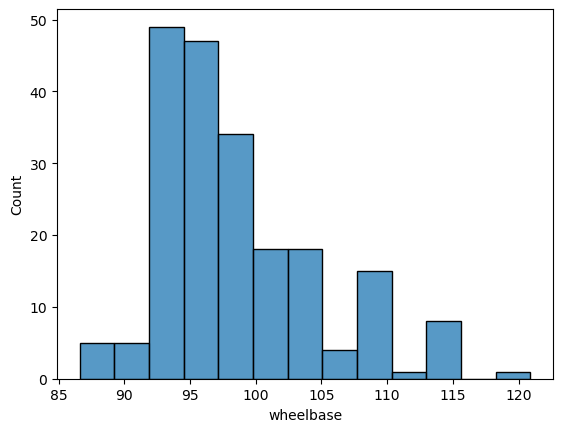

In [135]:
sns.histplot(data=cars, x = "wheelbase")
plt.show()

#### Citympg: the score a car will get on average in city conditions, with stopping and starting at lower speeds.

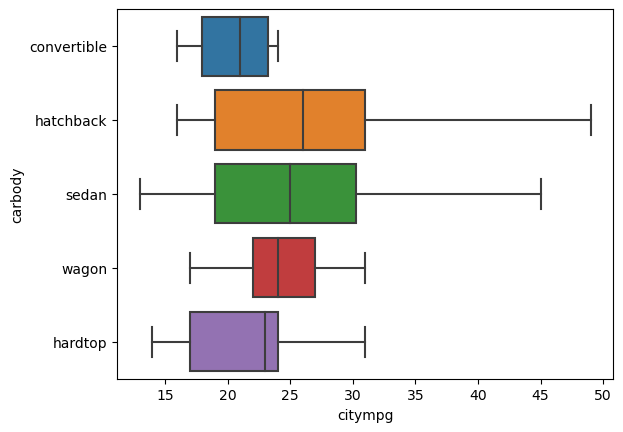

In [136]:
sns.boxplot(data=cars, x = "citympg", y = "carbody")
plt.show()

From this boxplot, you can make several observations:

- The median 'citympg' varies by 'carbody' type, with some body types (like hatchbacks) potentially having higher median 'citympg' than others (like sedans).
- The IQR is different for each 'carbody' type, indicating varying levels of dispersion in 'citympg'. For instance, the 'sedan' category has a more compact IQR, suggesting that the 'citympg' for most sedans is more consistent than for convertibles.
- The range of 'citympg' (as indicated by the whiskers) also varies, with some car body types showing a wider range of 'citympg' values.
- There don't appear to be any outliers shown in this plot, as there are no points plotted beyond the whiskers.

By examining this plot, one could infer the efficiency of different car body types in terms of fuel consumption in the city, with some types being potentially more fuel-efficient on average than others.

#### Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.

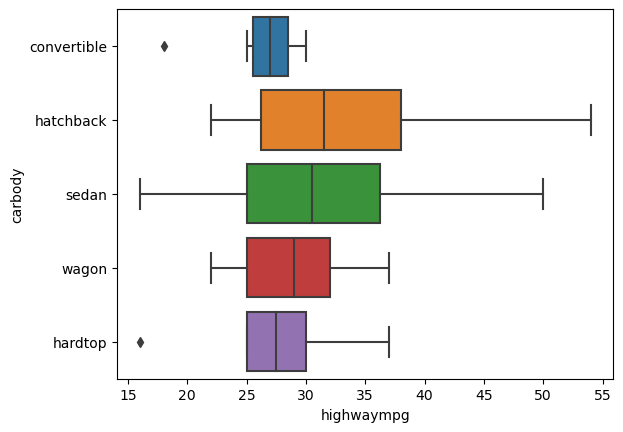

In [137]:
sns.boxplot(data=cars, x = "highwaympg", y = "carbody")
plt.show()

Observations from the boxplot:

- Convertibles and hardtops have outliers on the lower end, indicating that there are some models that are significantly less fuel-efficient compared to most cars in their respective categories.

- The hatchbacks have the widest interquartile range, suggesting more variability in highway MPG within that category.

- The median highway MPG is different for each car body type, which suggests that each body type has a different typical fuel efficiency on the highway. For example, the median for sedans is around the mid-30s MPG.

- The range (IQR) is also different across the car body types. The hatchback type, represented by the orange box, has a larger IQR, meaning there's more variation in highway MPG among hatchbacks.

-  'wagon' types have shorter whiskers, indicating less variability in highway MPG

Overall, the boxplot gives a clear comparison of highway MPG across different car body types, highlighting central tendencies, variability, and the presence of outliers within each category.


#### Boxplot between price and carbody

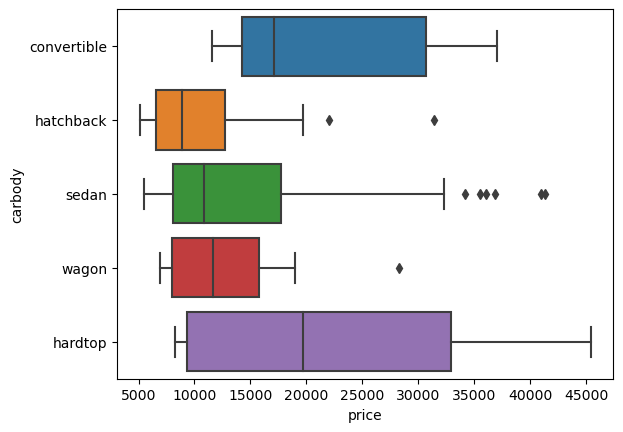

In [138]:
sns.boxplot(data=cars, x = "price", y = "carbody")
plt.show()

From the plot, we can make several observations:

- The 'hardtop' and 'convertible' categories have higher median prices compared to the 'sedan', 'hatchback', and 'wagon' categories.

- The 'sedan' category shows several outliers on the higher price end, suggesting that while most sedans are within a certain price range, there are a few sedans that are significantly more expensive.

- The 'wagon' category has one outlier, indicating at least one wagon with a much higher price than typical for that category.

- The price range (as indicated by the boxes and whiskers) varies significantly across car body types. For instance, convertibles show a wide range of prices, whereas hatchbacks have a more compact range, suggesting less variation in their prices.

- The 'hatchback' category has the lowest median price, which might suggest it's generally the most affordable car body type among those listed.

Overall, the boxplot provides insights into the car prices associated with each car body type, highlighting the differences in central price tendencies, variability, and the presence of significantly higher or lower priced cars within each category.

#### curbweight: weight of car without occupants or baggage

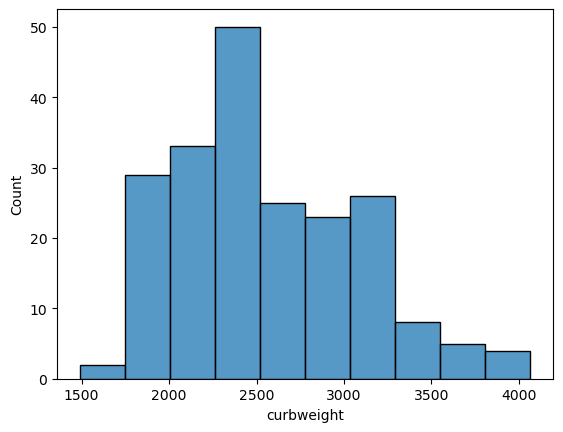

In [139]:
sns.histplot(data=cars, x = "curbweight")
plt.show()

#### Stroke: volume of the engine (the distance traveled by the piston in each cycle)

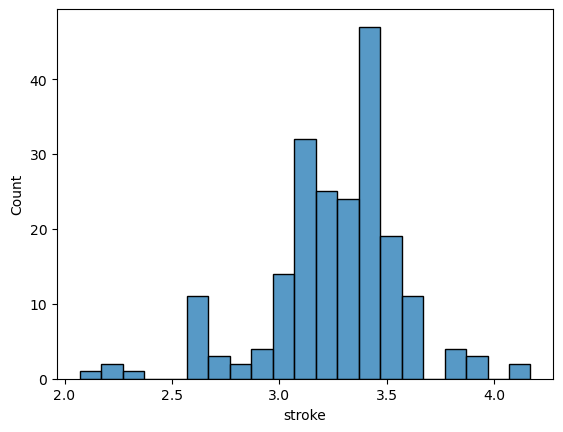

In [140]:
sns.histplot(data=cars, x = "stroke")
plt.show()

#### compression ratio: ratio of volume of compression chamber at largest capacity to least capacity

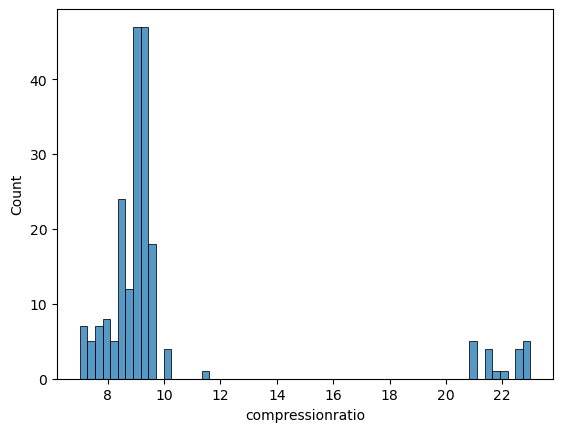

In [141]:
sns.histplot(data=cars, x = "compressionratio")
plt.show()

From the histogram, you can infer:

- The majority of cars have a compression ratio between roughly 8 and 10, as indicated by the tallest bar.
- There is a smaller group of cars that have higher compression ratios, around 21 to 23, which suggests that there are fewer cars with high compression ratios in this dataset.
- The distribution of compression ratios is not uniform and shows a gap between the common range (8 to 10) and the less common higher values (around 21 to 23). This might suggest two different types of engines or engine settings in the dataset, possibly indicating a mixture of normal and high-efficiency or turbocharged engines, which tend to have higher compression ratios.

Overall, the histogram provides a clear visual representation of how the compression ratios in the dataset are distributed and indicates that there are two distinct groupings of cars based on their compression ratio.

#### Target variable: price of car

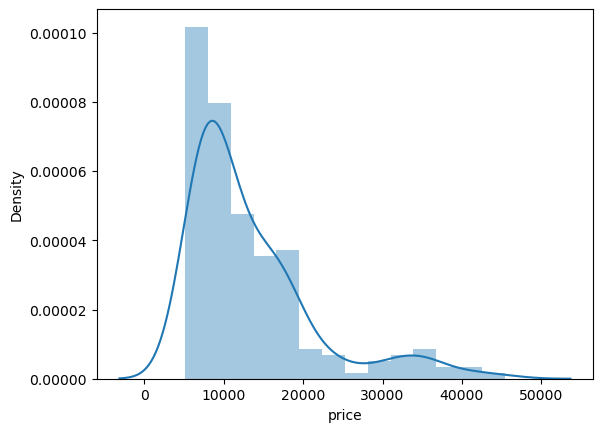

In [142]:
sns.distplot(cars['price'])
plt.show()

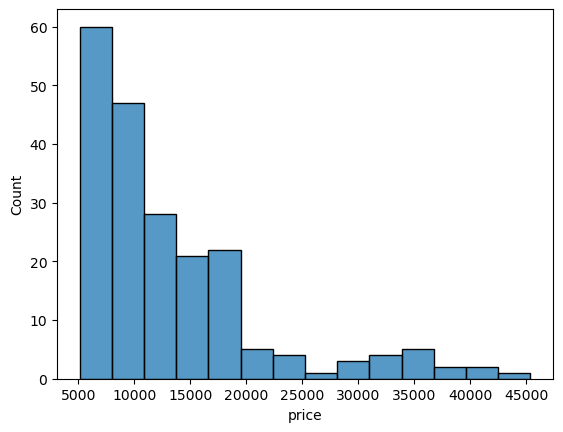

In [143]:
sns.histplot(data=cars, x = "price")
plt.show()

Observations from the histogram:

- Most cars are concentrated in the lower price range, with the first bar indicating that the highest number of cars are priced at or below USD10,000.

- The number of cars decreases as the price increases. This is evident as the bars get shorter after the first one.

- The distribution is right-skewed, meaning there are a few cars that are priced much higher than the majority. These are represented by the bars on the far right of the histogram.

- There are very few cars in the highest price bins, above USD35,000.

This histogram suggests that the majority of cars in the dataset are relatively affordable, with fewer luxury or high-priced cars. The distribution also indicates that high-priced cars are exceptions rather than the norm within this dataset.

### 2. Data Cleaning
Let's now conduct some data cleaning steps

We've seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories). 

Note that it can be used in the model as a numeric variable also.

In [144]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [145]:
# converting symboling to categorical 
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Checking for null values or missing values

In [146]:
cars.isnull().values.any()

False

In [147]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null or missing values.

Next, we need to extract the company name from the column "CarName".

In [148]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.

In [149]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [150]:
carnames.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [151]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [152]:
carnames.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Let's create a new column to store the company name and check whether it looks okay.

In [153]:
# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [154]:
# look at all the values
cars['car_company'].astype('category').value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [155]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [157]:
cars['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Notice that some car-company names are misspelled - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [158]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] =  'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [159]:
cars['car_company'].astype('category').value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

The car_company variable looks okay now. Let's now drop the CarName variable.

In [160]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [161]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### Checking for Outliers

In [162]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [163]:
print(cars_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.2 KB
None


We do not want 'car_ID'

In [164]:
# dropping car_id
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [165]:
cars_numeric.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Visualizing outlier using Box Plot

It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<function matplotlib.pyplot.show(close=None, block=None)>

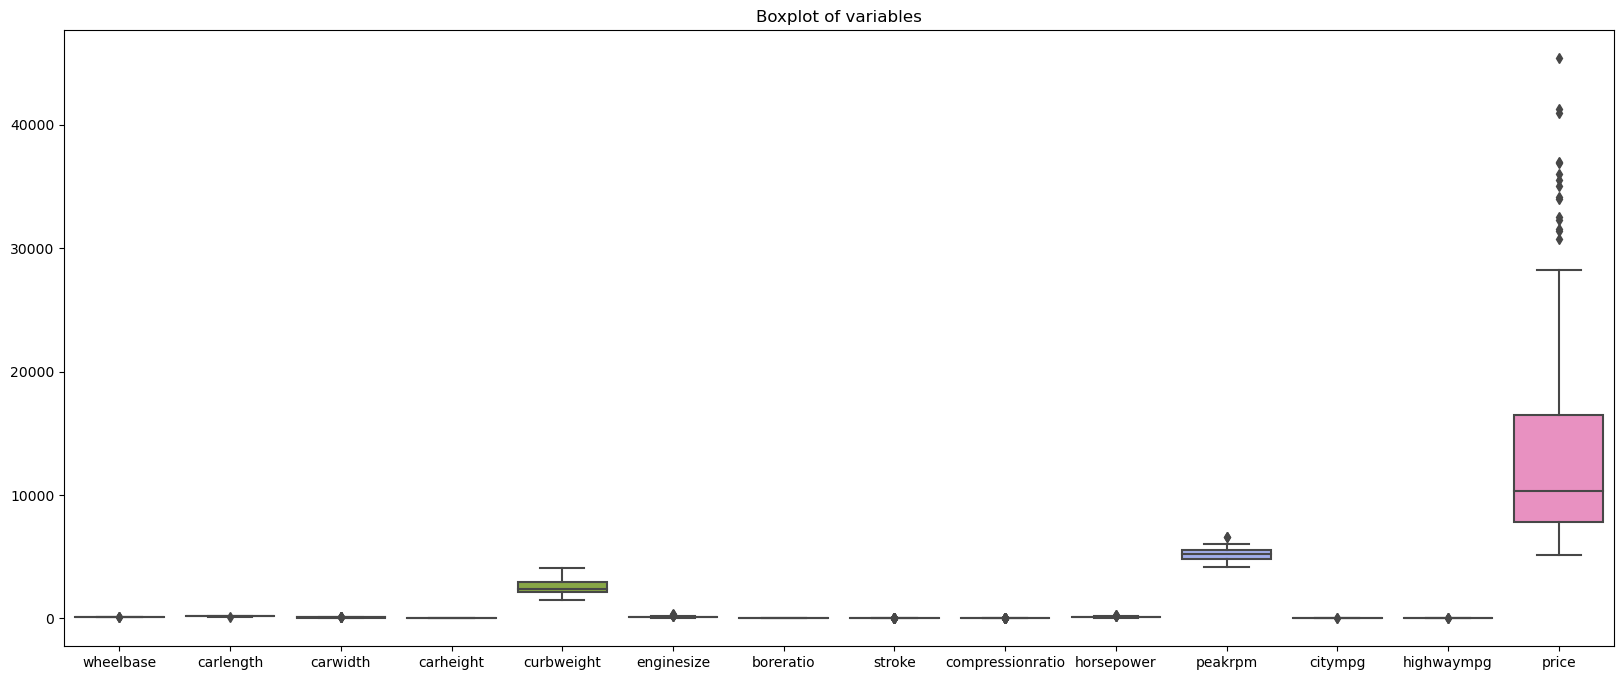

In [173]:
import seaborn as sns
#sns.boxplot(df_diabetics['bmi'])

plt.figure(figsize=(20, 8))

sns.boxplot(data=cars_numeric)

plt.title('Boxplot of variables')
plt.show

There are no outliers, except we can see outliers in the 'price' column, but we can conclude by saying that there are some pricey cars above USD30,0000. So, there is no need for outlier treatment.

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable.Let's see whether that's true in this case.

We will first subset the list of all independent numeric variables, and then make a pairwise plot.

#### Let's now make a pairwise scatter plot and observe linear relationships.


<Figure size 2000x1000 with 0 Axes>

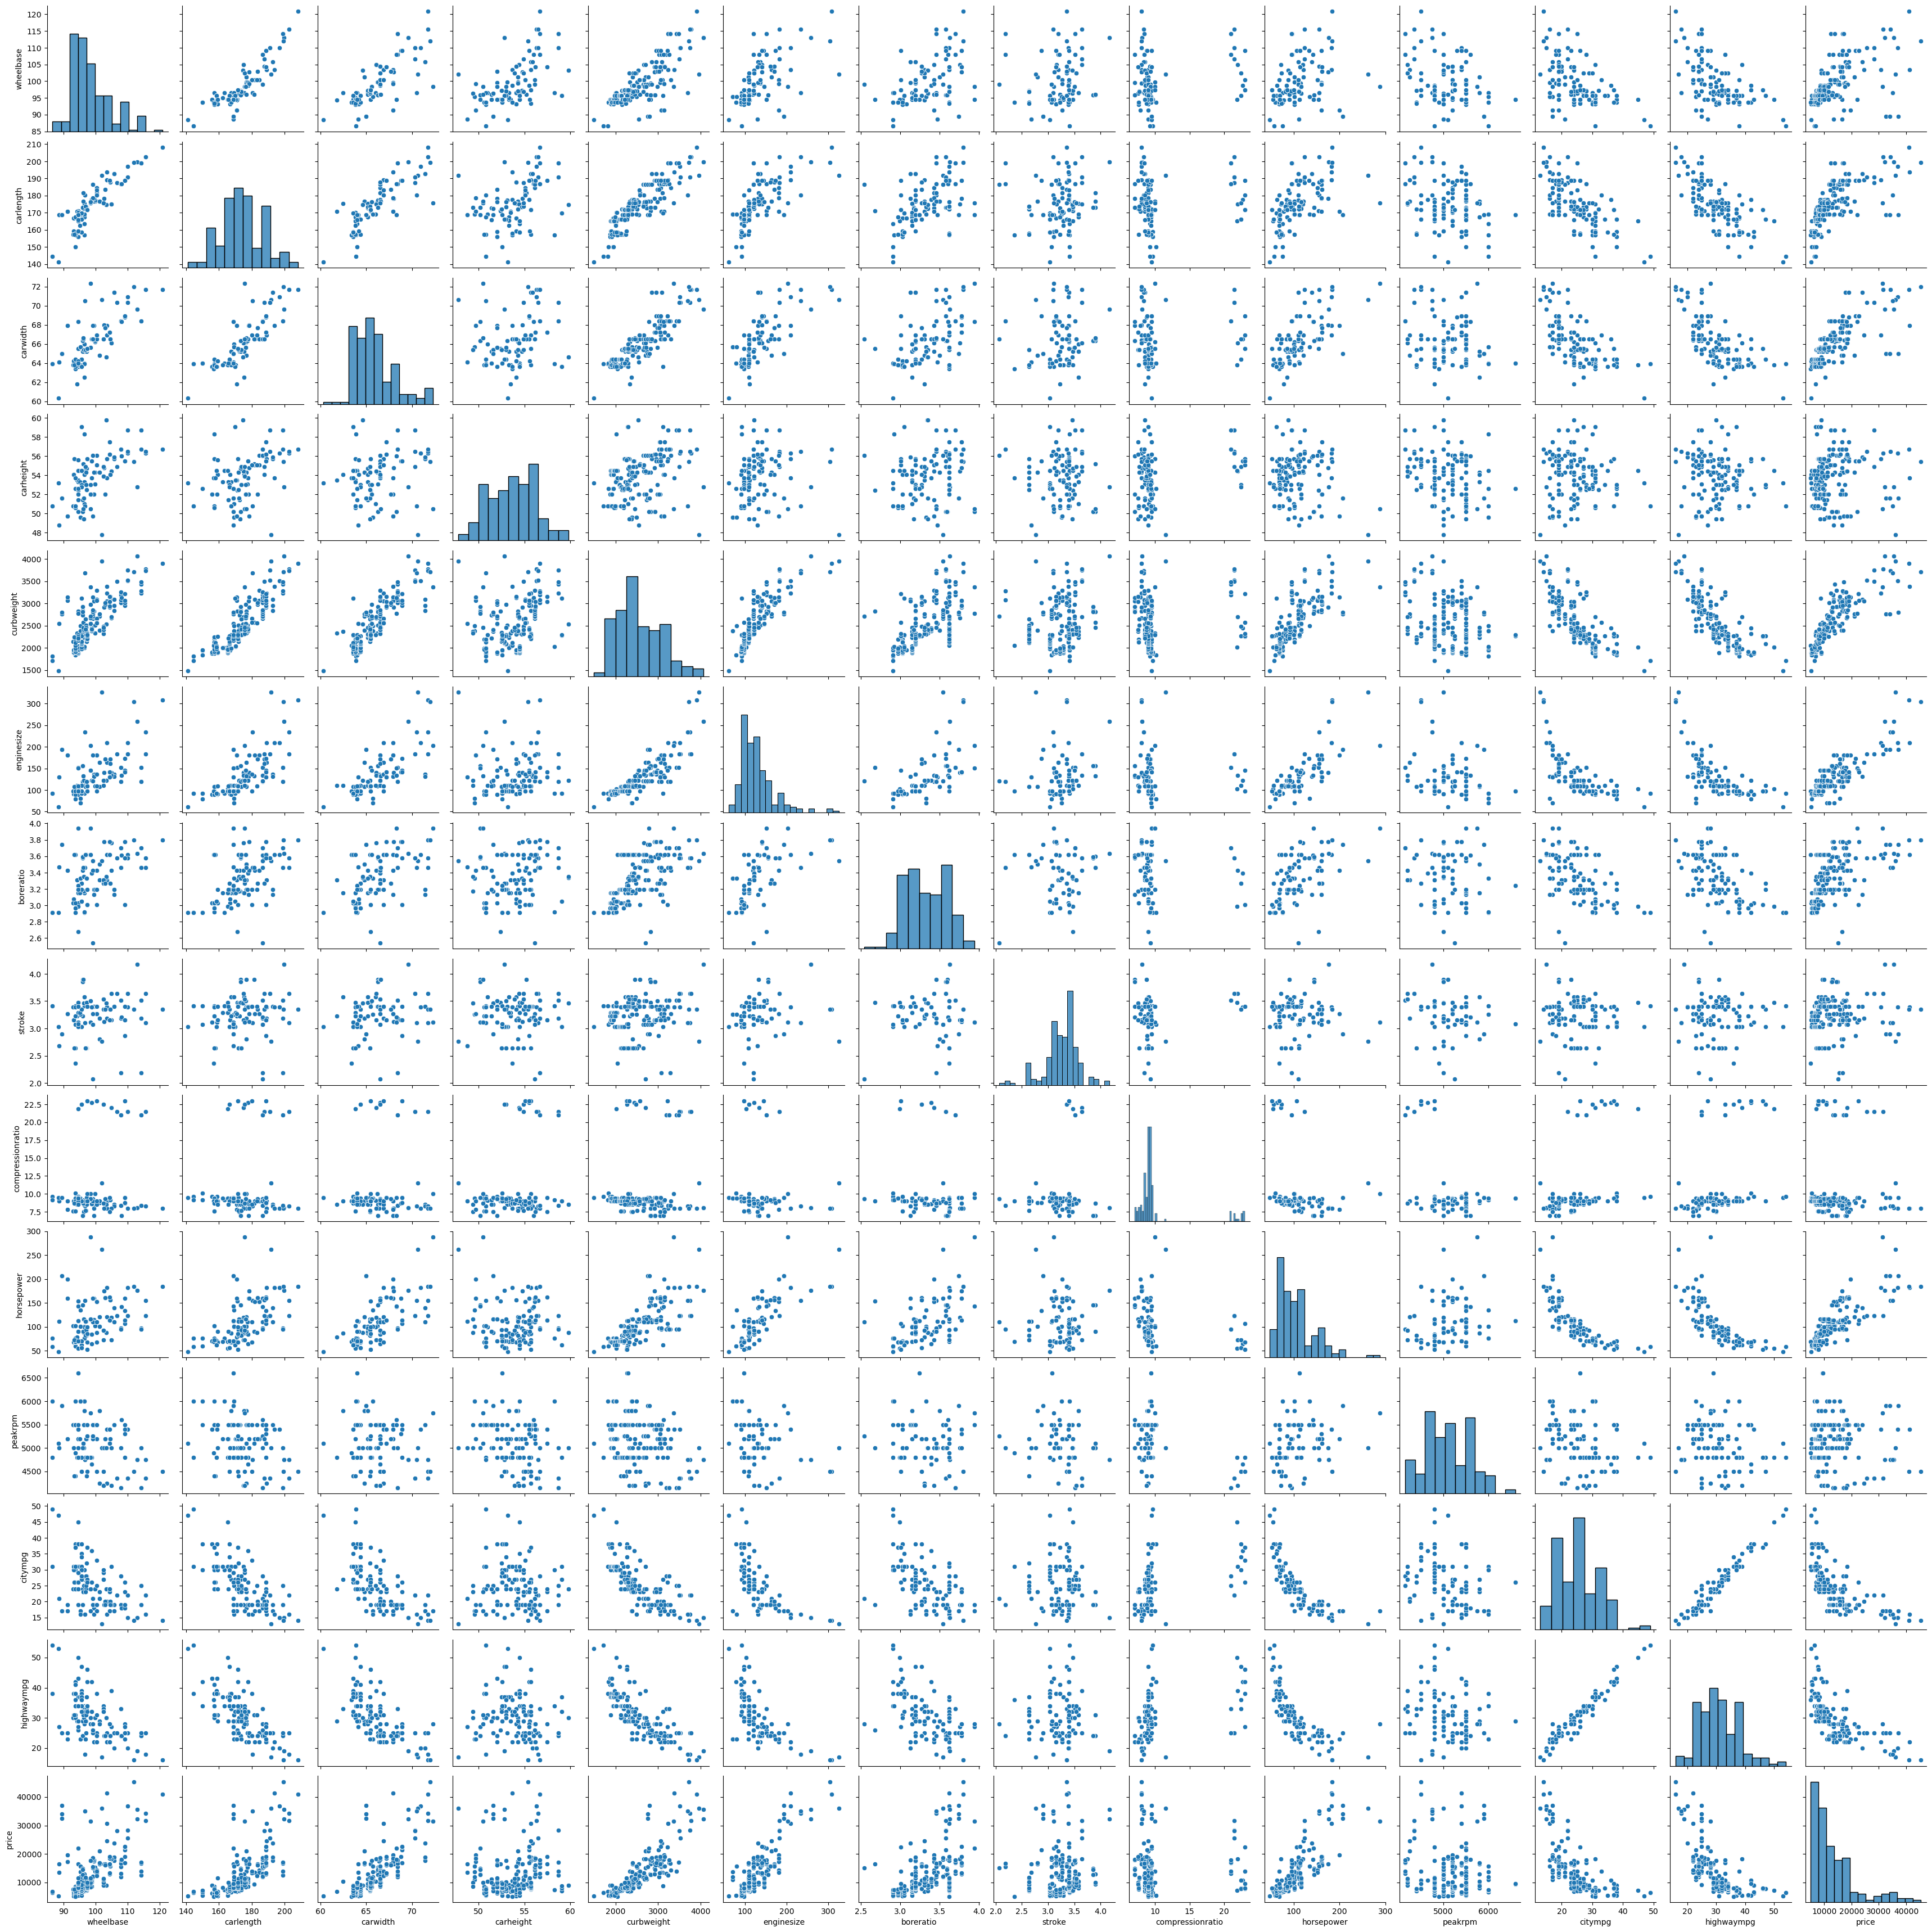

In [174]:
# pairwise scatter plot
plt.figure(figsize=(20,10))
sns.pairplot(cars_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualize multiple correlations in one plot

In [175]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


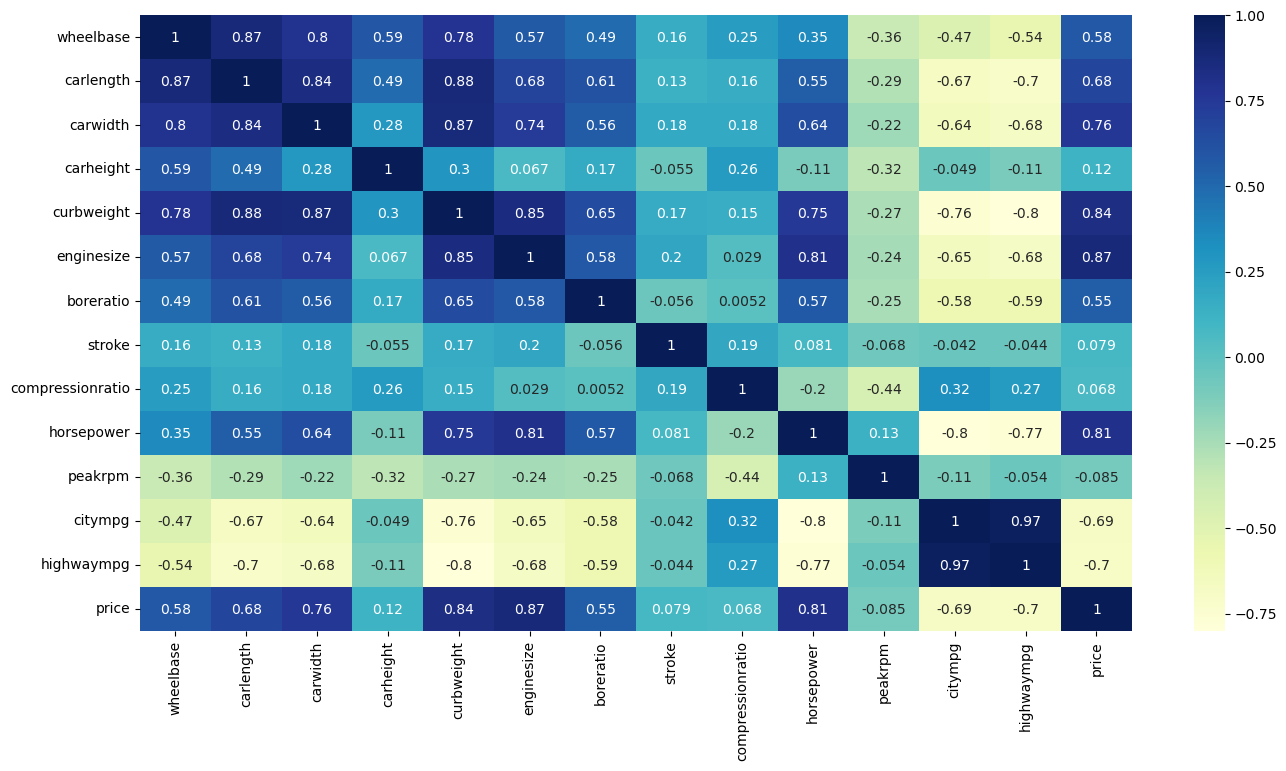

In [176]:
# Plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

#heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated. 

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [177]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [178]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### 3. Data Preparation

#### Data Preparation
Let's now prepare the data and build the model.



In [179]:
# Split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [180]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [181]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Create dummy variables for categorical variables

In [182]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [183]:
cars_categorical.shape

(205, 11)

In [184]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
# drop categorical variables
X = X.drop(list(cars_categorical.columns), axis=1)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [186]:
X.shape

(205, 13)

In [187]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,False,False,False,False,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,False,False,False,False,False,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,False,False,False,False,False,False,False,False,False


In [188]:
X.shape

(205, 68)

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    int64  
 5   enginesize              205 non-null    int64  
 6   boreratio               205 non-null    float64
 7   stroke                  205 non-null    float64
 8   compressionratio        205 non-null    float64
 9   horsepower              205 non-null    int64  
 10  peakrpm                 205 non-null    int64  
 11  citympg                 205 non-null    int64  
 12  highwaympg              205 non-null    int64  
 13  symboling_-1            205 non-null    bool   
 14  symboling_0             205 non-null    bo

In [190]:
# Scaling the features
from sklearn.preprocessing import scale

# Storing column names in cols, since column names are lost after scaling (the df is converted to a numpy array)
cols = X.columns
cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [191]:
X = pd.DataFrame(scale(X))
X

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.238120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,4.199567


In [192]:
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [193]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [194]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    float64
 5   enginesize              205 non-null    float64
 6   boreratio               205 non-null    float64
 7   stroke                  205 non-null    float64
 8   compressionratio        205 non-null    float64
 9   horsepower              205 non-null    float64
 10  peakrpm                 205 non-null    float64
 11  citympg                 205 non-null    float64
 12  highwaympg              205 non-null    float64
 13  symboling_-1            205 non-null    float64
 14  symboling_0             205 non-null    fl

### 4. Model Building and Evaluation

#### Split into train and test


In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression. 

#### Ridge Regression

In [196]:
# list of alphas to tune
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Ridge regression model. Ridge regression is a method used to prevent overfitting by introducing a penalty term to the loss function.

Here's a step-by-step explanation of what each part of the code does:

1. List of alphas to tune: The params dictionary contains one key, 'alpha', which is associated with a list of values. These values are the different hyperparameters for the Ridge regression that you want to test. The alpha parameter controls the strength of the regularization applied to the model: the larger the alpha, the more regularization, which reduces the magnitude of the coefficients in the model.

2. Ridge object creation: ridge = Ridge() creates a Ridge regression estimator with default parameters.

3. Setting up cross-validation: folds = 5 sets the number of folds for cross-validation. In this case, the data will be split into 5 parts, where each part is used as a test set once while the remaining parts are used as the training set.

4. GridSearchCV: model_cv is an instance of GridSearchCV, which is a method that performs a cross-validated grid search over the specified parameter values for an estimator. Here's what the parameters mean:

- estimator = ridge: The Ridge regression model is used as the base estimator.
- param_grid = params: The grid of parameters (alpha values) to search over.
- scoring = 'neg_mean_absolute_error': The scoring function used to evaluate the performance of the model on the test set. Here, it uses the negative mean absolute error, which means that the grid search will try to minimize this value.
- cv = folds: The cross-validation splitting strategy uses 5 folds.
- return_train_score=True: This tells the grid search to include training scores for each fold. This can be useful to see if there is overfitting.
- verbose = 1: This controls the verbosity: the higher, the more messages. Here, it will give some feedback about what the computer is doing.

5. Fitting the Model: model_cv.fit(X_train, y_train) runs the grid search over the defined parameter grid and fits the Ridge regression model to the training data (X_train, y_train). This process involves training a Ridge regression model for each value of alpha in the list, for each fold in the cross-validation, and then selecting the alpha value that results in the best performance according to the mean absolute error.

After this code is executed, model_cv will contain the results of the grid search, including the best alpha parameter and the performance metrics for each combination of parameters tested during the search.

In [197]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.383842,0.720577,0.015922,0.017519,0.0001,{'alpha': 0.0001},-2854.116752,-1413.812300,-1531.761541,-3968.369904,...,-2466.863611,937.837752,26,-694.753230,-814.178930,-832.351826,-903.775793,-720.171139,-793.046184,76.452403
1,0.003125,0.006250,0.003125,0.006250,0.001,{'alpha': 0.001},-2846.765330,-1412.112714,-1533.523778,-3944.973694,...,-2460.751844,929.782223,25,-695.179504,-813.808050,-831.764642,-903.295166,-719.845373,-792.778547,76.185169
2,0.006250,0.007655,0.003125,0.006250,0.01,{'alpha': 0.01},-2784.176328,-1396.101814,-1548.469470,-3780.266249,...,-2415.039453,873.169878,24,-699.262955,-811.621551,-827.106090,-898.841647,-717.550342,-790.876517,73.714558
3,0.003125,0.006250,0.000000,0.000000,0.05,{'alpha': 0.05},-2640.682659,-1355.068116,-1580.736324,-3300.686592,...,-2285.104051,719.477783,23,-713.345673,-812.877044,-817.962405,-886.516756,-711.346429,-788.409662,67.335524
4,0.006251,0.007656,0.003125,0.006250,0.1,{'alpha': 0.1},-2563.275484,-1359.228650,-1589.294656,-2966.273419,...,-2198.282455,615.981941,22,-721.902772,-815.578758,-811.644501,-878.629933,-708.742470,-787.299687,63.532012


This code is dealing with the results obtained from the `GridSearchCV` process that was previously described. It processes and filters the results using `pandas`, which is a Python library for data manipulation and analysis. Here's what each line is doing:

1. `cv_results = pd.DataFrame(model_cv.cv_results_)`: 
    - `model_cv.cv_results_` contains a dictionary of detailed results for all the alpha values that were tested during the grid search. It includes the mean test scores, mean train scores, the standard deviation of scores, and the parameters for each set of results, among other information.
    - `pd.DataFrame(model_cv.cv_results_)` converts this dictionary into a `pandas` DataFrame, which is a 2-dimensional labeled data structure with columns that can be of different types. This makes it easier to inspect and analyze the results of the grid search.

2. `cv_results = cv_results[cv_results['param_alpha']<=200]`: 
    - This line filters the DataFrame to only include the rows where the value of 'param_alpha' is less than or equal to 200. The 'param_alpha' column in the DataFrame contains the alpha values that were tested. This step is likely being done to focus on a more relevant range of alpha values for further analysis or plotting, excluding any alpha values greater than 200 that may be less interesting or relevant.

3. `cv_results.head()`:
    - This function returns the first five rows of the filtered DataFrame. It's a quick way to peek at the top rows of the DataFrame and is often used to check if the DataFrame has been set up correctly or to quickly view the results without displaying the entire DataFrame.

The final output of these lines of code will be a concise table that shows the top five sets of results from the grid search, but only for those runs where the alpha parameter was 200 or less. This table will help in analyzing which alpha values (up to 200) gave the best results in terms of the cross-validated negative mean absolute error.

In [198]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

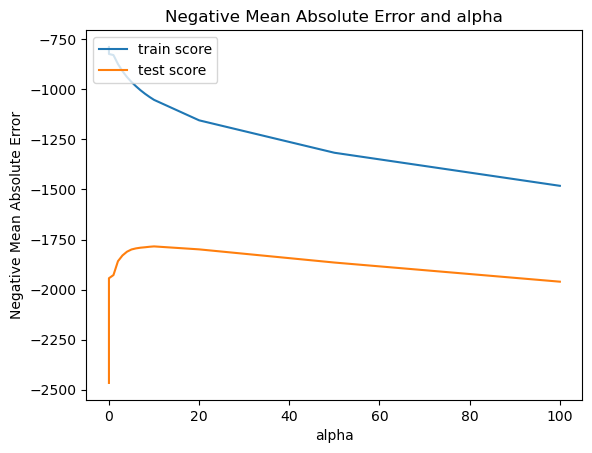

In [199]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- Alpha (Regularization Strength): The x-axis represents the alpha parameter, which controls the strength of regularization. As alpha increases, the model becomes more regularized.

- Train Score (Blue Line): The training score starts very low (which corresponds to a low error in positive terms) when there is little to no regularization (alpha is close to 0). As alpha increases, the training error also increases (the negative MAE decreases), indicating that the model is getting worse on the training data due to increased regularization.

- Test Score (Orange Line): The test score behaves differently. With low alpha values, the test error is quite high (the negative MAE is very low), indicating that the model might be overfitting the training data and performing poorly on the test data. As alpha increases, the error decreases, which means the model's generalization is improving up to a certain point.

- Overfitting and Underfitting: At low alpha values, the model is likely overfitting, which is indicated by a low training error and a high test error. At some point, as alpha increases, the test error decreases, meaning the model starts to generalize better and overfit less. If alpha is increased too much (beyond the data shown in this plot), the model would start to underfit, which is not depicted here but would be indicated by both the training and test errors increasing.

- Optimal Alpha Range: The optimal value of alpha is likely to be in the range where the test score is at its peak (or the negative MAE is at its minimum). This is the point where the model achieves the best generalization performance. From the graph, it seems like the turning point is somewhere before alpha reaches 20.

- Model Selection: Based on this graph, you would select an alpha that minimizes the test error. This alpha provides the best compromise between bias and variance, helping to build a model that neither overfits nor underfits.

In [200]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.52557941e+02,  9.46530017e+01,  1.34511343e+03, -3.35849314e+02,
        1.16515775e+03,  1.33122540e+03, -1.18579444e+01, -2.84669666e+02,
        1.23313363e+01,  9.29481098e+02,  3.23313329e+02, -2.04711197e+01,
       -8.41293665e+01,  2.21783691e+02,  1.66376475e+02,  6.11555386e+01,
       -1.75468993e+01,  2.28698304e+02, -2.11820147e+02,  4.11053298e+02,
        1.01320701e+02,  2.63588369e+01, -5.29501748e+02, -2.71545584e+02,
       -2.23762142e+02, -2.44396310e+02,  2.61656901e+02,  9.20191503e+02,
       -1.93176012e+01, -2.18315631e+02,  3.13602886e+02,  2.38744211e+01,
        3.92105941e+00,  9.46640067e+01, -4.24237855e+02, -5.81409615e+02,
       -1.05817250e+02,  2.93070489e+02, -2.36048487e+02,  9.46640067e+01,
        5.15255069e+01, -1.79077288e+02,  2.11820147e+02, -1.44440927e-28,
       -3.95308641e+00, -1.36403005e+02, -1.44440927e-28,  3.35662090e+02,
        1.46679730e+03,  1.05750051e+03, -1.30931401e+02, -3.49739603e+02,
       -2.82007527e+02, -

- ridge.fit(X_train, y_train): This line fits the Ridge regression model to the training data. X_train contains the feature variables of the training set, and y_train contains the corresponding target variable. The fit method computes the coefficients (weights) for the features in X_train that are associated with the target variable y_train.

- ridge.coef_: After the model is fitted, ridge.coef_ contains the coefficients (weights) learned for each feature in X_train. These coefficients represent the relationship between each feature and the target variable. The sign of each coefficient indicates the direction of the relationship (positive or negative), and the magnitude indicates the strength of the relationship.

Essentially, after executing this code, you will have a trained Ridge regression model with a specific regularization strength (alpha = 15), and you will be able to inspect the coefficients that the model has learned to understand how each feature affects the prediction.

#### Lasso

In [201]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143242,0.146026,0.006250,0.007655,0.0001,{'alpha': 0.0001},-2324.752863,-1442.052401,-1582.911324,-3365.795489,...,-2209.514582,685.115001,15,-707.533143,-813.096166,-825.366072,-900.619438,-714.974164,-792.317797,72.696148
1,0.069499,0.008654,0.004926,0.006386,0.001,{'alpha': 0.001},-2325.597811,-1441.914232,-1582.918610,-3365.543227,...,-2209.575240,685.082344,16,-707.541145,-813.094508,-825.357146,-900.608340,-714.974339,-792.315096,72.690031
2,0.069123,0.007392,0.006251,0.007656,0.01,{'alpha': 0.01},-2334.050379,-1440.536627,-1582.991423,-3363.022314,...,-2210.185916,684.768785,17,-707.632117,-813.079516,-825.273418,-900.497476,-714.975747,-792.291655,72.627018
3,0.068744,0.007658,0.006252,0.007657,0.05,{'alpha': 0.05},-2371.746047,-1434.479193,-1583.311429,-3351.844342,...,-2213.000651,683.667517,19,-708.062390,-813.098957,-825.058880,-900.011123,-715.024017,-792.251073,72.353255
4,0.071879,0.007660,0.006251,0.007656,0.1,{'alpha': 0.1},-2419.028230,-1426.999122,-1583.704217,-3337.915603,...,-2216.697355,682.964265,20,-708.611287,-813.186719,-824.854499,-899.429607,-715.099045,-792.236231,72.023011


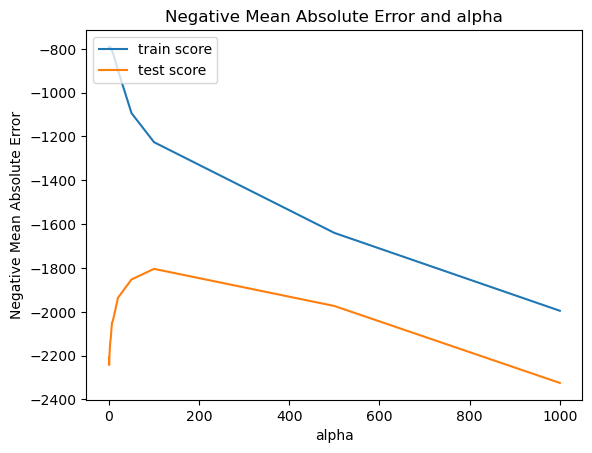

In [203]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [204]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [205]:
lasso.coef_

array([   0.        ,   -0.        , 1747.1052243 ,  -82.23183774,
       1780.64173078,  788.28807799,   -0.        ,   -0.        ,
          0.        , 1017.48820119,   84.89633333,    0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
          0.        ,  246.519852  ,  -73.38572878,  120.56790634,
          0.        ,    0.        , -187.60748943,    0.        ,
        -96.25412649, -134.39227325,  294.27227486, 1218.02281069,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,   -0.        , -202.47407284,
         -0.        ,  197.70712322,   -0.        ,    0.        ,
         -0.        ,   -0.        ,   58.81424436,   -0.        ,
          0.        ,   -0.        ,   -0.        ,  186.35685239,
       1805.30123983, 1210.72936345,    0.        ,   -0.        ,
         -0.        ,   78.54297249,  796.29612837,    0.        ,
         -0.        , -397.80411254,  -58.198149  , -377.78256